<a href="https://colab.research.google.com/github/aydawudu/NLP/blob/main/Sarcasm(_NLP_RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 15 - Lesson 2ab - Notebook

In [10]:
import json
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json




--2021-12-09 20:14:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 173.194.76.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2021-12-09 20:14:28 (93.6 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [11]:
with open("/tmp/sarcasm.json", 'r') as f:
  datastore=json.load(f)


sentences=[]
labels=[]
urls=[]

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

print(sentences[0])
print(labels[0])



former versace store clerk sues over secret 'black code' for minority shoppers
0


In [12]:
vocab_size=1000
embedding_dim=16
max_length=120
trunc_type='post'
padding_type='post'
oov_tok="<OOV>"
training_size=20000

training_sentences=sentences[0:training_size]
testing_sentences=sentences[training_size:]
training_labels=labels[0:training_size]
testing_labels=labels[training_size:]

tokenizer=Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index=tokenizer.word_index

training_sequences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length,padding=padding_type, truncating=trunc_type )

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)


In [13]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           16000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs=50
history=model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
625/625 [==============================] - 47s 65ms/step - loss: 0.4552 - accuracy: 0.7647 - val_loss: 0.3995 - val_accuracy: 0.8158
Epoch 2/50
625/625 [==============================] - 39s 63ms/step - loss: 0.3633 - accuracy: 0.8349 - val_loss: 0.3901 - val_accuracy: 0.8207
Epoch 3/50
625/625 [==============================] - 40s 63ms/step - loss: 0.3456 - accuracy: 0.8423 - val_loss: 0.3835 - val_accuracy: 0.8217
Epoch 4/50
625/625 [==============================] - 39s 63ms/step - loss: 0.3239 - accuracy: 0.8542 - val_loss: 0.3748 - val_accuracy: 0.8317
Epoch 5/50
625/625 [==============================] - 39s 63ms/step - loss: 0.3081 - accuracy: 0.8625 - val_loss: 0.3757 - val_accuracy: 0.8286
Epoch 6/50
625/625 [==============================] - 40s 63ms/step - loss: 0.2978 - accuracy: 0.8669 - val_loss: 0.3756 - val_accuracy: 0.8319
Epoch 7/50
625/625 [==============================] - 39s 63ms/step - loss: 0.2881 - accuracy: 0.8730 - val_loss: 0.3773 - val_accuracy:

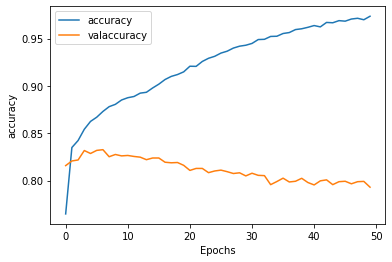

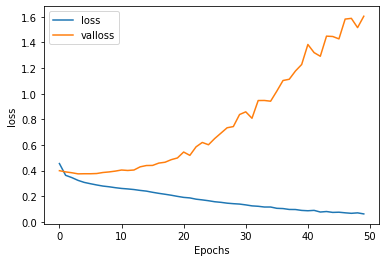

In [16]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')